<a href="https://colab.research.google.com/github/Kaiziferr/machine_learning/blob/main/linear_regression/01_workshop_linear_regresion_beisbol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib  import style
import seaborn as sns

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# **Hipotesis**
---
Existe una relación entre el número de veces que batean los jugadores de un equipo de beisbol y el número de runs que consiguen.


# **Data**
---


In [3]:
teams = ["Texas","Boston","Detroit","Kansas","St.","New_S.","New_Y.",
           "Milwaukee","Colorado","Houston","Baltimore","Los_An.","Chicago",
           "Cincinnati","Los_P.","Philadelphia","Chicago","Cleveland","Arizona",
           "Toronto","Minnesota","Florida","Pittsburgh","Oakland","Tampa",
           "Atlanta","Washington","San.F","San.I","Seattle"]

bateos = [5659,  5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598,
          5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559,
          5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]

runs = [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654, 735,
        667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570,
        593, 556]

In [4]:
data = pd.DataFrame({
    'Equipos': teams,
    'Bateos': bateos,
    'Runs': runs
})

In [5]:
data.head(3)

,Equipos,Bateos,Runs
0,Texas,5659,855
1,Boston,5710,875
2,Detroit,5563,787


Text(0.5, 1.0, 'Distribución de bateos y carreras')

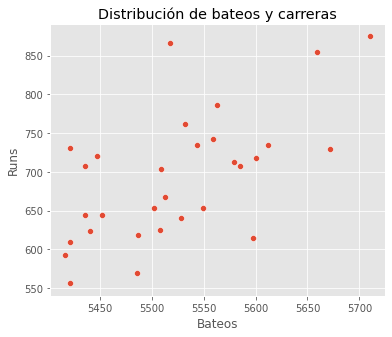

In [6]:
fig, ax = plt.subplots(figsize = (6, 5))
sns.scatterplot(x = 'Bateos', y='Runs', data=data, ax=ax)
ax.set_title('Distribución de bateos y carreras')

**Analisis de correlación**

In [7]:
corr_test = pearsonr(x=data['Bateos'], y=data['Runs'])
print(f'Coeficiente de Pearson {corr_test[0]}')
print(f'p-value {corr_test[1]}')

Coeficiente de Pearson 0.6106270467206688
p-value 0.0003388351359791963


El grafico y el test de correlación muestran una relación lineal, de intensidad considerable (r=0.61) y significativa (p-value = 0.000338). Lo anterior indica que se puede crear un modelo de regresión lineal con el objetivo de predecir el número de Runs en función del número de bateos del equipo.

# **Ajuste del modelo**
---

In [8]:
X = data[['Bateos']]
y = data[['Runs']]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1234)

In [10]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1, 1)

# **Creación modelo**
---

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# **Información del modelo**
---

In [12]:
print(f'Intercept: {model.intercept_}')
print(f'Coeficiente: {list(zip(X.columns, model.coef_.flatten(), ))}')
print(f'Coeficiente de determinación R^2 {model.score(X,y)}')

Intercept: [-2367.7028413]
Coeficiente: [('Bateos', 0.5528713534479736)]
Coeficiente de determinación R^2 0.3586119899498744


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


- El modelo solo explica un 35% de la variabilidad del modelo entorno a su media, es un modelo regular.

# **Evaluación del modelo**
---

In [13]:
predict = model.predict(X_test)

In [14]:
rmse = mean_squared_error(y_test, predict, squared=False)
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 59.336716083360486


# **Statmodels**

Permite calcular los test estadísticos y análisis necesarios para verificar que se cumplen las condiciones sobre las que se basa este tipo de modelos.

In [15]:
X_train = sm.add_constant(X_train, prepend=True)
model = sm.OLS(endog=y_train, exog=X_train,)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Runs   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     8.191
Date:                Sat, 19 Nov 2022   Prob (F-statistic):            0.00906
Time:                        19:50:29   Log-Likelihood:                -134.71
No. Observations:                  24   AIC:                             273.4
Df Residuals:                      22   BIC:                             275.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2367.7028   1066.357     -2.220      0.0

# Intervalos de confianza de los coeficientes
---


In [16]:
model.conf_int(alpha=0.05)

,0,1
const,-4579.192050,-156.213633
x1,0.152244,0.953499


.predict(): devuelve únicamente el valor de las predicciones.

.get_prediction().summary_frame(): devuelve, además de las predicciones, los intervalos de confianza asociados.

In [17]:
X_test = sm.add_constant(X_test, prepend=True)
X_test

array([[1.000e+00, 5.447e+03],
       [1.000e+00, 5.585e+03],
       [1.000e+00, 5.532e+03],
       [1.000e+00, 5.710e+03],
       [1.000e+00, 5.417e+03],
       [1.000e+00, 5.544e+03]])

In [18]:
y_predict = model.predict(exog=X_test)
y_predict

array([643.78742093, 720.0836677 , 690.78148597, 789.19258689,
       627.20128033, 697.41594221])

In [19]:
y_predict = model.get_prediction(exog=X_test).summary_frame(alpha=0.05)
y_predict.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,643.787421,19.905798,602.505323,685.069519,494.417495,793.157346
1,720.083668,18.956093,680.771137,759.396198,571.246045,868.921291
2,690.781486,14.331474,661.059827,720.503144,544.184965,837.378007
3,789.192587,39.404654,707.472336,870.912838,624.009772,954.375402


# **Representación gráfica del modelo**
---


límites superior e inferior del intervalo de confianza.

In [41]:
predicciones = model.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['X'] = X_train[:, 1]
predicciones['y'] = y_train

predicciones = predicciones.sort_values('X')

In [71]:
# feature y target data trainim 
def plot_predict_confidence_interval(data, label, title='', size=(7, 4)):
  
  X, y, mean = data["X"], data["y"], data["mean"], 
  mean_ci_lower, mean_ci_upper = data["mean_ci_lower"], data["mean_ci_upper"]

  fig, ax = plt.subplots(figsize = size)
  ax.scatter(X, y, marker = 'o', color = 'gray')
  ax.plot(X, mean, linestyle='-', label="OLS")
  ax.plot(X, mean_ci_lower, linestyle='--', color='red', label=label)
  ax.plot(X, mean_ci_upper, linestyle='--', color='red')
  ax.fill_between(X, mean_ci_lower, mean_ci_upper, alpha=0.1)
  ax.set_title(title)
  ax.legend()
  plt.show()

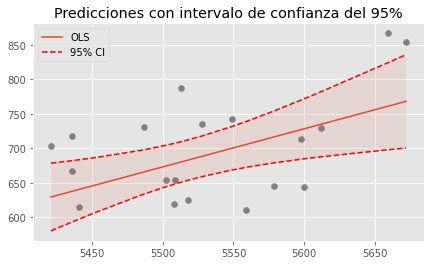

In [72]:
plot_predict_confidence_interval(predicciones, label = '95% CI', title='Predicciones con intervalo de confianza del 95%' )

# **Referencia**
---
https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html